This exercise delves into quantum gates that are defined in terms of angles $R_x(\theta)$, $R_y(\theta)$, $R_z(\theta)$

Applications: The angles in these gates are used as "tuning" mechanisms in **variational quantum algorithms** to minimize cost functions (e.g. in variational quantum eigensolver, gate parameters are used to minimize the expectation of the Hamiltonian $<\psi(\theta)|{H}|\psi(\theta)>$



Goal: Set up simple quantum circuit with one parameterized gate, and execute the algorithm for a sweep of parameters and plot the measurement results. The symbol is used to represent the numerical value of the parameter that will be determined later

In [1]:
# Imports
import matplotlib.pyplot as plt
import sympy
import cirq

# Create a qubit register and create a circuit
qbit = cirq.LineQubit(0)
circ = cirq.Circuit()
symbol = sympy.Symbol("t")


In [2]:
# Add a parameterised gate
circ.append(cirq.XPowGate(exponent=symbol)(qbit))

# Measure
circ.append(cirq.measure(qbit, key="z"))

In [3]:
print("Circuit:")
print(circ)

Circuit:
0: ───X^t───M('z')───


Sweep over the parameter values in linear space, starting at 0 and stopping at 2 with 100 readings in between.

run_sweep executes the circuit at all values in a sweep. For each value, the circuit is simulated ${repetitions} times

In [8]:
# Get a sweep over the parameter values
sweep = cirq.Linspace(key=symbol.name, start=0.0, stop=2.0, length=100)
sim = cirq.Simulator()
res = sim.run_sweep(circ, sweep, repetitions=1000)

For each value in the sweep, plot the measurement outcome

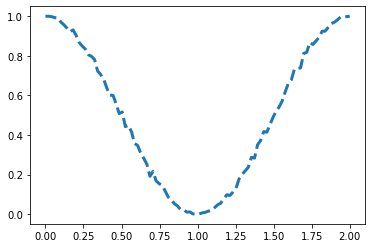

In [10]:
angles = [x[0][1] for x in sweep.param_tuples()]
zeroes = [res[i].histogram(key="z")[0]/1000 for i in range(len(res))]
plt.plot(angles, zeroes, "--", linewidth=3)